In [2]:
import os
import torch

from CODE.AttentionDCA_python.src.dcascore import score, compute_PPV_from_map
import matplotlib.pyplot as plt

cwd = os.getcwd()

filename = cwd + '/CODE/DataAttentionDCA/hsp70/hsp70_train_new.fasta'
dist_map_file=cwd+'/CODE/DataAttentionDCA/hsp70/hsp70.map'

In [3]:
def read_tensor_from_txt(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    # Read the dimensions from the first line
    dims = list(map(int, lines[0].strip().split()))
    
    # Initialize a list to hold the tensor data
    tensor_data = []
    
    current_slice = []
    for line in lines[1:]:
        line = line.strip()
        if line.startswith("Slice"):
            if current_slice:  # If there is an existing slice, save it
                tensor_data.append(current_slice)
                current_slice = []
        elif line:  # Process non-empty lines
            current_slice.append(list(map(float, line.split(','))))
    
    if current_slice:  # Append the last slice
        tensor_data.append(current_slice)
    
    # Convert the list back into a tensor with the original dimensions
    tensor = torch.tensor(tensor_data).view(*dims)

    del tensor_data
    
    return tensor

H= 48 , d= 23 , L= 597
score calculated
PPV@100:  0.79
PPV@0.5L:  0.5436241610738255
PPV@L:  0.4154103852596315
H= 60 , d= 23 , L= 597
score calculated
PPV@100:  0.92
PPV@0.5L:  0.6711409395973155
PPV@L:  0.5192629815745393
H= 100 , d= 23 , L= 597
score calculated
PPV@100:  0.98
PPV@0.5L:  0.7550335570469798
PPV@L:  0.5745393634840871
H= 150 , d= 23 , L= 597
score calculated
PPV@100:  0.99
PPV@0.5L:  0.8322147651006712
PPV@L:  0.626465661641541
H= 180 , d= 23 , L= 597
score calculated
PPV@100:  0.96
PPV@0.5L:  0.825503355704698
PPV@L:  0.6197654941373534
H= 200 , d= 23 , L= 597
score calculated
PPV@100:  1.0
PPV@0.5L:  0.87248322147651
PPV@L:  0.626465661641541


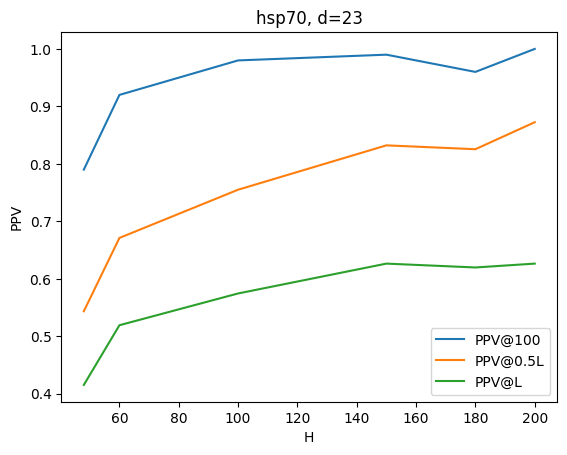

In [3]:
loss_type = 'without_J'
family = 'hsp70'
epochs = 300

d=23
Hs_d23=[48,60,100,150,180, 200]
PPVs_d23_100=[]
PPVs_d23_05L=[]
PPVs_d23_L=[]

for H in Hs_d23: 
    K = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
    Q = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
    V = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

    L=Q.shape[2]

    print("H=", H, ", d=", d, ", L=", L)

    ranking, _ = score(Q, K, V, nb_pred=L+1) 
    print("score calculated")
    del K, Q, V

    PPVs = [compute_PPV_from_map(ranking, dist_map_file, min_separation=5, cutoff= 10, nb_pred=L+1)][0]
    
    del ranking

    ppv_99 = PPVs[99]
    ppv_05L = PPVs[int(L/2-1)]
    ppv_L = PPVs[int(L-1)]

    del PPVs
    
    print("PPV@100: ", ppv_99)
    print("PPV@0.5L: ", ppv_05L)
    print("PPV@L: ", ppv_L)

    PPVs_d23_100.append(ppv_99)
    PPVs_d23_05L.append(ppv_05L)
    PPVs_d23_L.append(ppv_L)

    torch.cuda.empty_cache()


plt.figure()
plt.plot(Hs_d23, PPVs_d23_100, label='PPV@100')
plt.plot(Hs_d23, PPVs_d23_05L, label='PPV@0.5L')
plt.plot(Hs_d23, PPVs_d23_L, label='PPV@L')
plt.title("{family}, d={d}".format(family=family, d=d))
plt.xlabel("H")
plt.ylabel("PPV")
plt.legend()
plt.savefig("./figs/{family}_d={d}.pdf".format(family=family, d=d))
plt.show()

In [ ]:
loss_type = 'without_J'
family = 'hsp70'
epochs = 300
H=180
ds_H180=[5,10,23,50,100,150,200]

PPVs_H180_100=[]
PPVs_H180_05L=[]
PPVs_H180_L=[]

for d in ds_H180: 
    K = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
    Q = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
    V = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

    L=Q.shape[2]

    print("H=", H, ", d=", d, ", L=", L)

    ranking, _ = score(Q, K, V, nb_pred=L+1) 
    print("score calculated")
    del K, Q, V

    PPVs = [compute_PPV_from_map(ranking, dist_map_file, min_separation=5, cutoff= 10, nb_pred=L+1)][0]
    
    del ranking

    ppv_99 = PPVs[99]
    ppv_05L = PPVs[int(L/2-1)]
    ppv_L = PPVs[int(L-1)]

    del PPVs
    
    print("PPV@100: ", ppv_99)
    print("PPV@0.5L: ", ppv_05L)
    print("PPV@L: ", ppv_L)

    PPVs_H180_100.append(ppv_99)
    PPVs_H180_05L.append(ppv_05L)
    PPVs_H180_L.append(ppv_L)

    torch.cuda.empty_cache()


plt.figure()
plt.plot(ds_H180, PPVs_H180_100, label='PPV@100')
plt.plot(ds_H180, PPVs_H180_05L, label='PPV@0.5L')
plt.plot(ds_H180, PPVs_H180_L, label='PPV@L')
plt.title("{family}, d={d}".format(family=family, d=d))
plt.xlabel("d")
plt.ylabel("PPV")
plt.legend()
plt.savefig("./figs/{family}_H={H}.pdf".format(family=family, H=H))
plt.show()
# plt.show()

In [29]:
import numpy as np
Z=np.array([[0,0,2,1],
   [1,0,0,1],
   [2,2,1,2],
   [0,1,2,1],
   [2,1,0,0]])
Z

array([[0, 0, 2, 1],
       [1, 0, 0, 1],
       [2, 2, 1, 2],
       [0, 1, 2, 1],
       [2, 1, 0, 0]])

In [31]:
V=np.array([[1,2,4],
           [3,6,7],
           [9,8,5]])
V

array([[1, 2, 4],
       [3, 6, 7],
       [9, 8, 5]])

In [34]:
V_z=V[:, Z]

In [35]:
V_z[0,:,:]

array([[1, 1, 4, 2],
       [2, 1, 1, 2],
       [4, 4, 2, 4],
       [1, 2, 4, 2],
       [4, 2, 1, 1]])

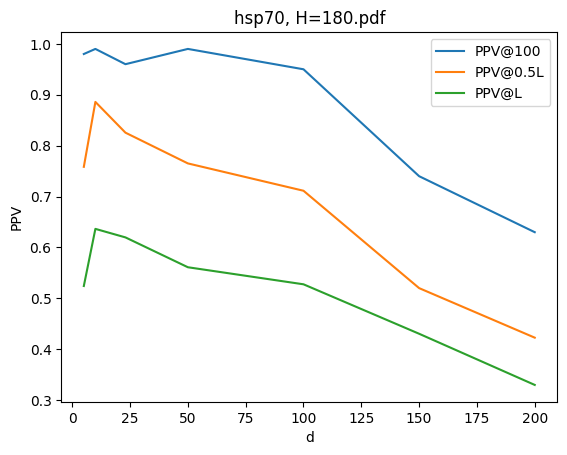

In [ ]:
plt.figure()
plt.plot(ds_H180, PPVs_H180_100, label='PPV@100')
plt.plot(ds_H180, PPVs_H180_05L, label='PPV@0.5L')
plt.plot(ds_H180, PPVs_H180_L, label='PPV@L')
plt.title("{family}, H={H}".format(family=family, H=H))
plt.xlabel("d")
plt.ylabel("PPV")
plt.legend()
plt.savefig("./figs/{family}_H={H}.pdf".format(family=family, H=H))
plt.show()

H= 50 , d= 50 , L= 597
score calculated
PPV@100:  0.82
PPV@0.5L:  0.5268456375838926
PPV@L:  0.3936348408710218
H= 100 , d= 50 , L= 597
score calculated
PPV@100:  0.97
PPV@0.5L:  0.6577181208053692
PPV@L:  0.49581239530988275
H= 150 , d= 50 , L= 597
score calculated
PPV@100:  0.99
PPV@0.5L:  0.6912751677852349
PPV@L:  0.5159128978224455


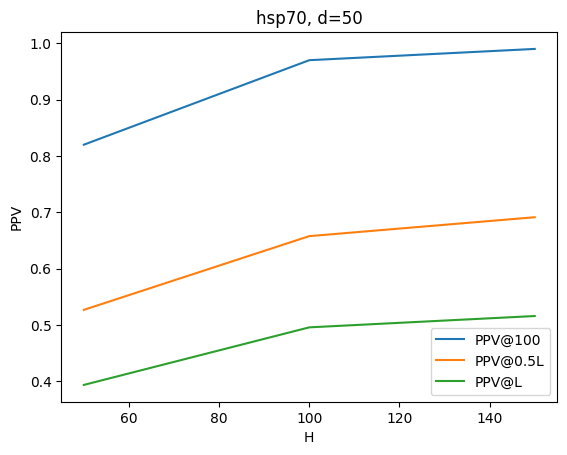

In [8]:
loss_type = 'without_J'
family = 'hsp70'
epochs = 300

d=50
Hs_d50=[50, 100, 150]
PPVs_d50_100=[]
PPVs_d50_05L=[]
PPVs_d50_L=[]

for H in Hs_d50: 
    K = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
    Q = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
    V = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

    L=Q.shape[2]

    print("H=", H, ", d=", d, ", L=", L)

    ranking, _ = score(Q, K, V, nb_pred=L+1) 
    print("score calculated")
    del K, Q, V

    PPVs = [compute_PPV_from_map(ranking, dist_map_file, min_separation=5, cutoff= 10, nb_pred=L+1)][0]
    
    del ranking

    ppv_99 = PPVs[99]
    ppv_05L = PPVs[int(L/2-1)]
    ppv_L = PPVs[int(L-1)]

    del PPVs
    
    print("PPV@100: ", ppv_99)
    print("PPV@0.5L: ", ppv_05L)
    print("PPV@L: ", ppv_L)

    PPVs_d50_100.append(ppv_99)
    PPVs_d50_05L.append(ppv_05L)
    PPVs_d50_L.append(ppv_L)

    torch.cuda.empty_cache()


plt.figure()
plt.plot(Hs_d50, PPVs_d50_100, label='PPV@100')
plt.plot(Hs_d50, PPVs_d50_05L, label='PPV@0.5L')
plt.plot(Hs_d50, PPVs_d50_L, label='PPV@L')
plt.title("{family}, d={d}".format(family=family, d=d))
plt.xlabel("H")
plt.ylabel("PPV")
plt.legend()
plt.savefig("./figs/{family}_d={d}.pdf".format(family=family, d=d))
plt.show()

# Jdoms, regularization

In [4]:
filename = cwd + '/CODE/DataAttentionDCA/jdoms/jdoms_bacteria_train2.fasta'
dist_map_file=cwd + '/CODE/DataAttentionDCA/jdoms/jdom.map'

H= 50 , d= 23 , L= 63 lambda= 1e-05
score calculated
PPV@L:  0.6190476190476191
PPV@3L/2:  0.5851063829787234
PPV@2L:  0.5238095238095238
H= 50 , d= 23 , L= 63 lambda= 5e-05
score calculated
PPV@L:  0.7619047619047619
PPV@3L/2:  0.6595744680851063
PPV@2L:  0.6428571428571429
H= 50 , d= 23 , L= 63 lambda= 0.0001
score calculated
PPV@L:  0.7936507936507936
PPV@3L/2:  0.7021276595744681
PPV@2L:  0.6587301587301587
H= 50 , d= 23 , L= 63 lambda= 0.00015
score calculated
PPV@L:  0.7936507936507936
PPV@3L/2:  0.6914893617021277
PPV@2L:  0.6190476190476191
H= 50 , d= 23 , L= 63 lambda= 0.0002
score calculated
PPV@L:  0.8412698412698413
PPV@3L/2:  0.7021276595744681
PPV@2L:  0.6111111111111112
H= 50 , d= 23 , L= 63 lambda= 0.00025
score calculated
PPV@L:  0.8095238095238095
PPV@3L/2:  0.6914893617021277
PPV@2L:  0.6111111111111112
H= 50 , d= 23 , L= 63 lambda= 0.0003
score calculated
PPV@L:  0.7619047619047619
PPV@3L/2:  0.6808510638297872
PPV@2L:  0.626984126984127
H= 50 , d= 23 , L= 63 lambda

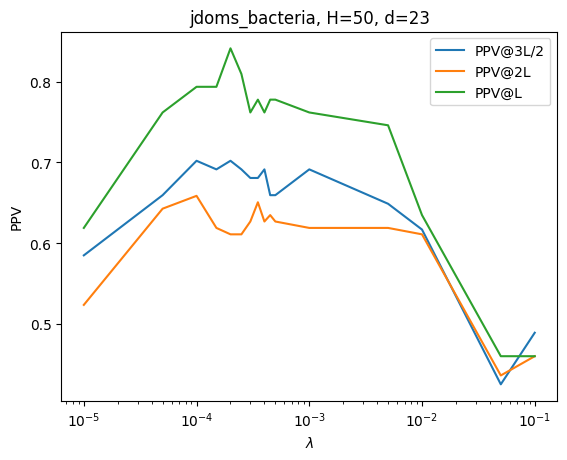

In [33]:
loss_type = 'without_J'
family = 'jdoms_bacteria'
epochs = 1000

d=23
H=50
lambdas=[0.00001, 0.00005, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003, 0.00035, 0.0004, 0.00045, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

PPVs_3L2=[]
PPVs_2L=[]
PPVs_L=[]

for l in lambdas: 
    K = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{l}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, l=l, epochs=epochs))
    Q = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{l}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, l=l, epochs=epochs)) 
    V = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{l}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, l=l, epochs=epochs))

    L=Q.shape[2]

    print("H=", H, ", d=", d, ", L=", L, "lambda=", l)

    ranking, _ = score(Q, K, V, nb_pred=2*L+1) 
    print("score calculated")
    del K, Q, V

    PPVs = [compute_PPV_from_map(ranking, dist_map_file, min_separation=5, cutoff= 10, nb_pred=2*L+1)][0]
    
    del ranking

    ppv_3L2 = PPVs[int(3*L/2-1)]
    ppv_2L = PPVs[int(2*L-1)]
    ppv_L = PPVs[int(L-1)]

    del PPVs

    print("PPV@L: ", ppv_L)
    print("PPV@3L/2: ", ppv_3L2)
    print("PPV@2L: ", ppv_2L)


    PPVs_3L2.append(ppv_3L2)
    PPVs_2L.append(ppv_2L)
    PPVs_L.append(ppv_L)

    torch.cuda.empty_cache()


plt.figure()
plt.plot(lambdas, PPVs_3L2, label='PPV@3L/2')
plt.plot(lambdas, PPVs_2L,  label='PPV@2L')
plt.plot(lambdas, PPVs_L,  label='PPV@L')
plt.title("{family}, H={H}, d={d}".format(family=family, H=H, d=d))
plt.xlabel(r"$\lambda$")
plt.ylabel("PPV")
plt.xscale('log')
plt.legend()
plt.savefig("./figs/{family}_reg.pdf".format(family=family))
plt.show()